# Heart disease UCI

In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 10)

import warnings
warnings.filterwarnings('ignore')

## Import du dataset

In [2]:
data_raw = pd.read_csv('heart.csv')
data = data_raw.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## EDA

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)
eda = train.copy()
print(train.shape)
print(test.shape)

(227, 14)
(76, 14)


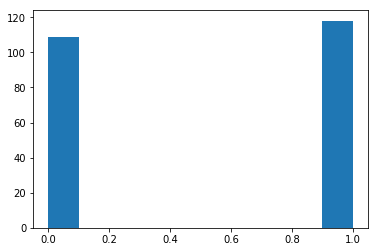

In [9]:
plt.hist(eda.target);

In [11]:
eda.nunique()

age          38
sex           2
cp            4
trestbps     46
chol        131
fbs           2
restecg       3
thalach      85
exang         2
oldpeak      38
slope         3
ca            5
thal          4
target        2
dtype: int64

In [101]:
bin_features = [feature for feature in eda.columns if eda[feature].nunique() == 2]
num_features = [feature for feature in eda.columns if eda[feature].nunique() > 10] + ['target']
cat_features = [feature for feature in eda.columns if feature not in (bin_features + num_features)] + ['target']

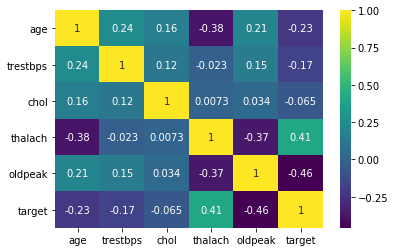

In [26]:
corr_mx = eda[num_features].corr()
sns.heatmap(corr_mx, cmap='viridis', annot=True);

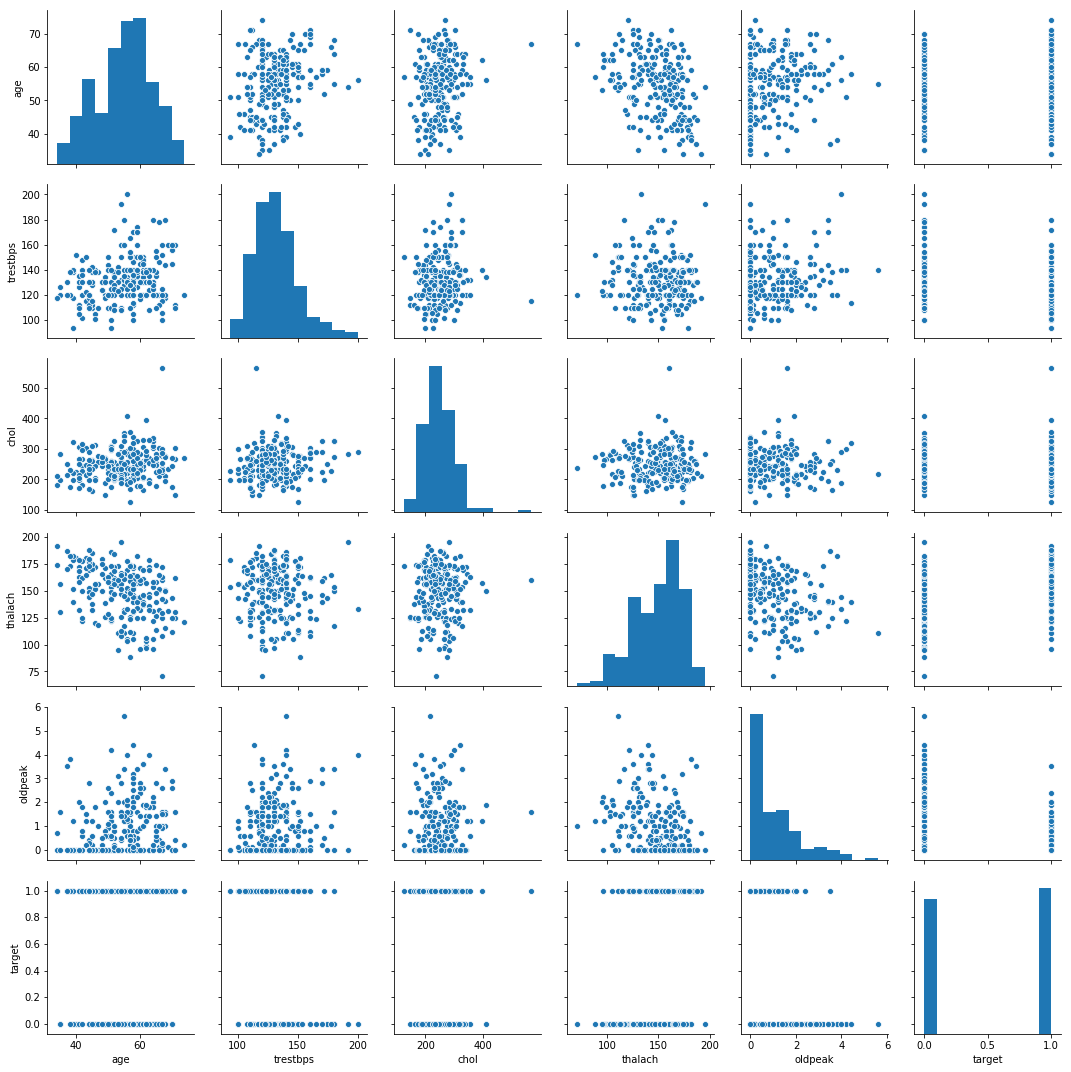

In [108]:
sns.pairplot(eda[num_features]);

In [28]:
cat_features

['cp', 'restecg', 'slope', 'ca', 'thal', 'target']

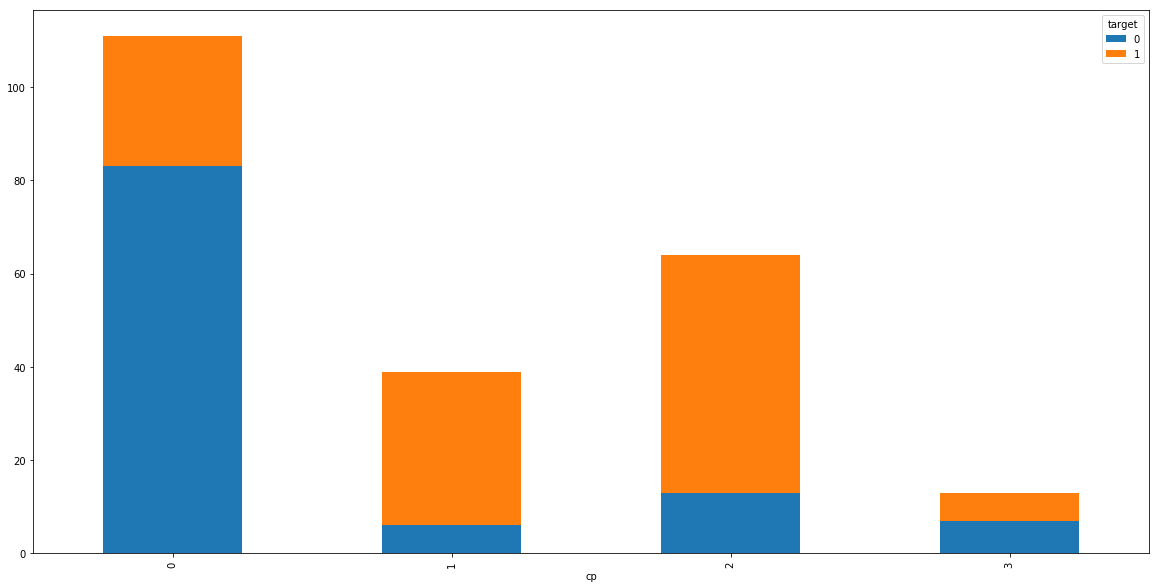

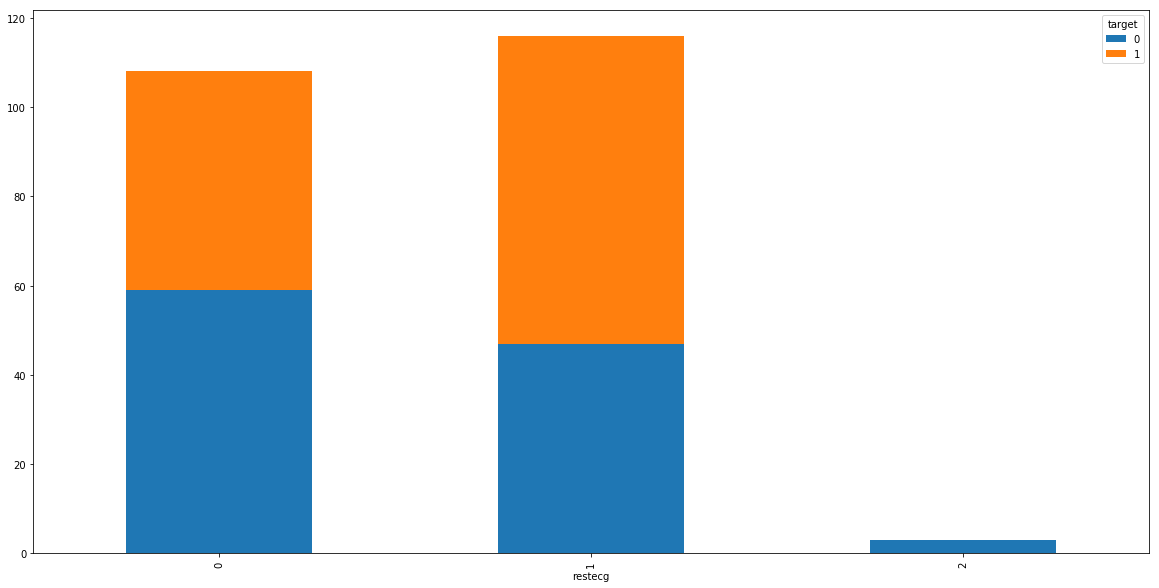

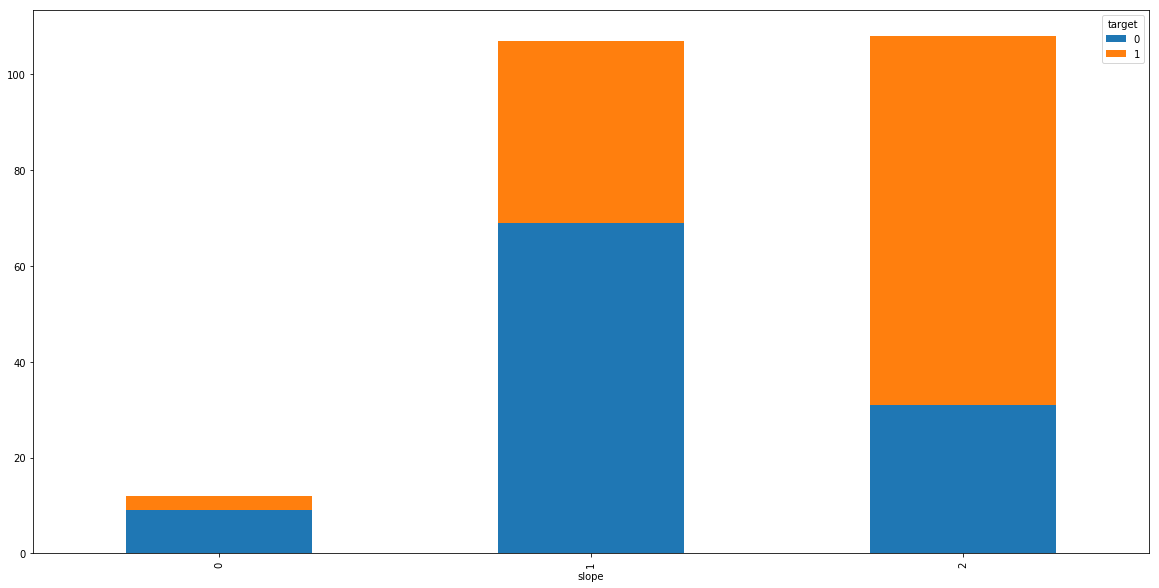

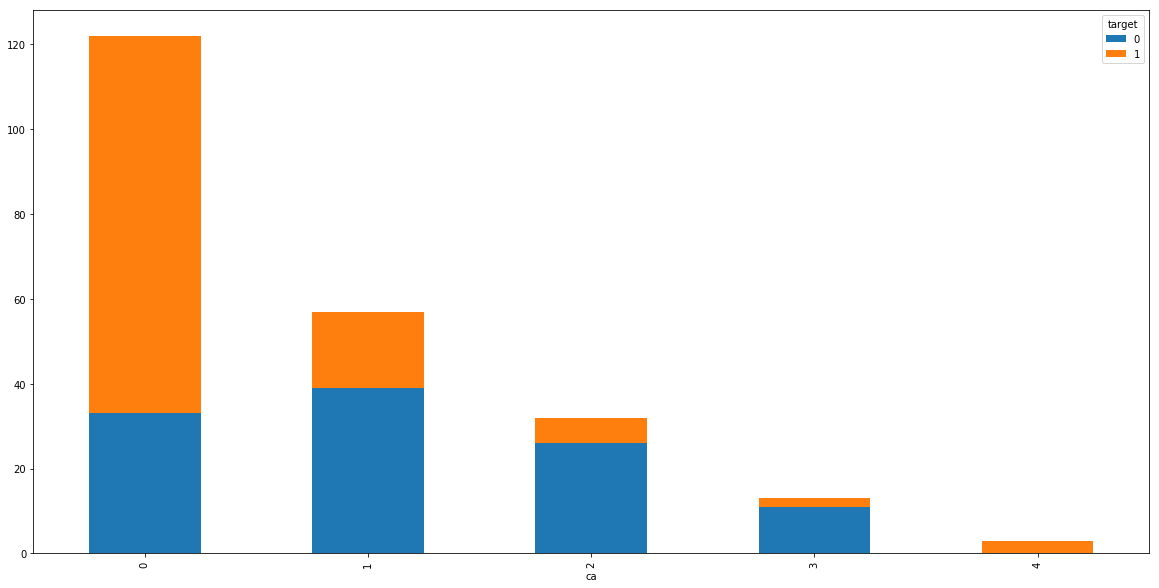

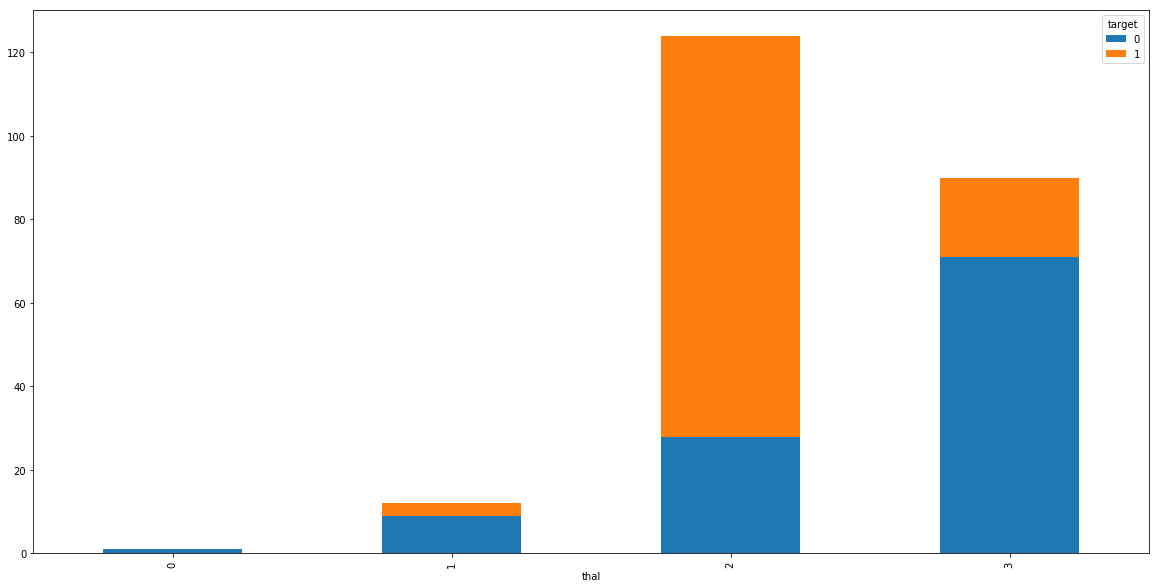

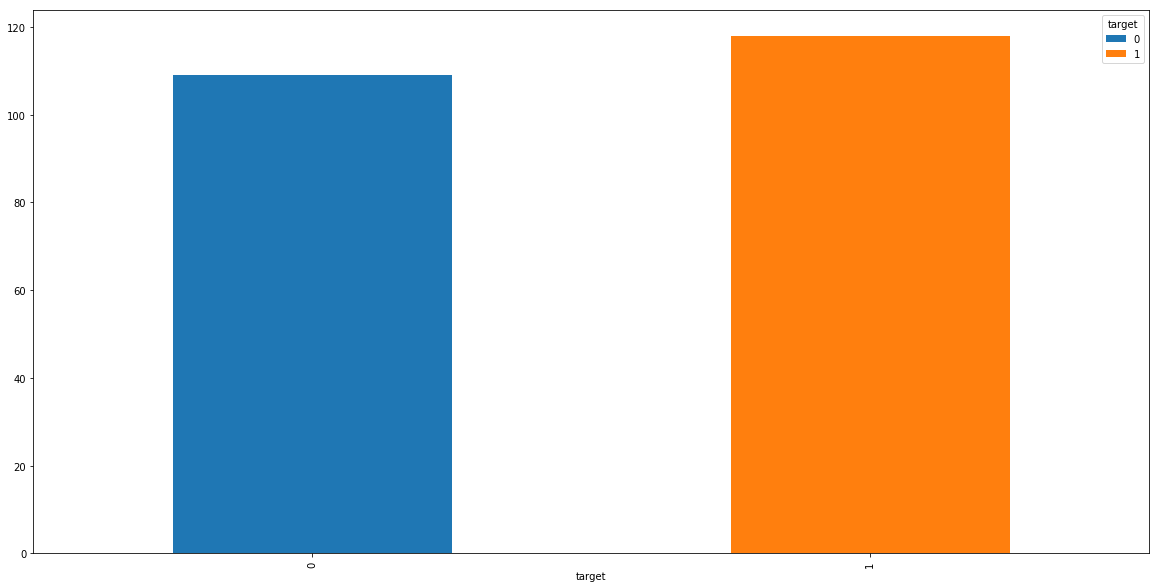

In [64]:
i=0
for feature in (cat_features):
    i += 1
    pd.crosstab(eda[feature], eda.target).plot.bar(stacked=True)
    plt.show()

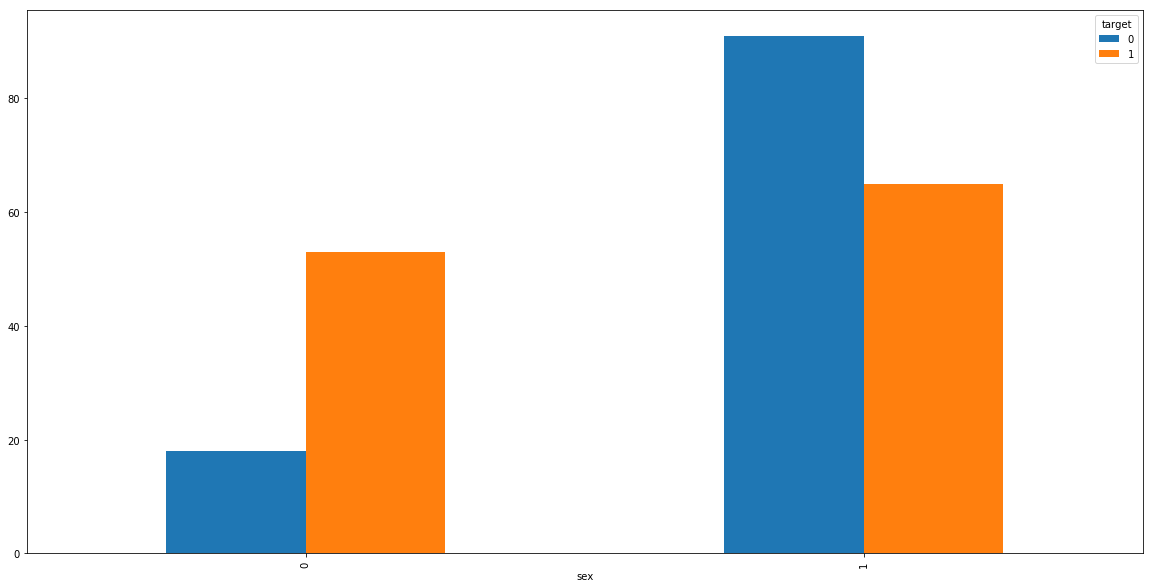

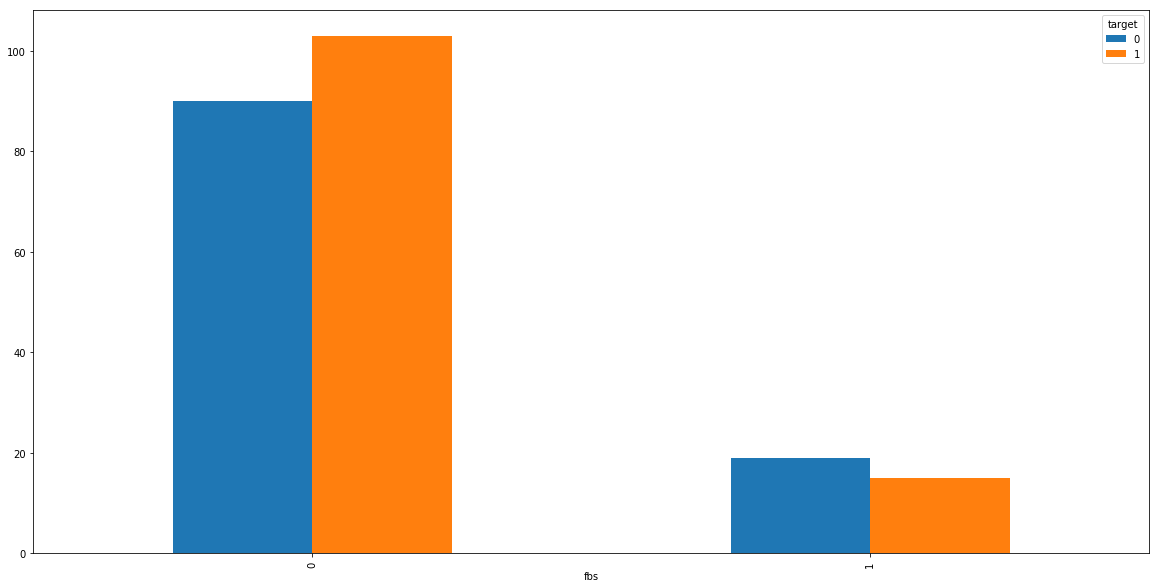

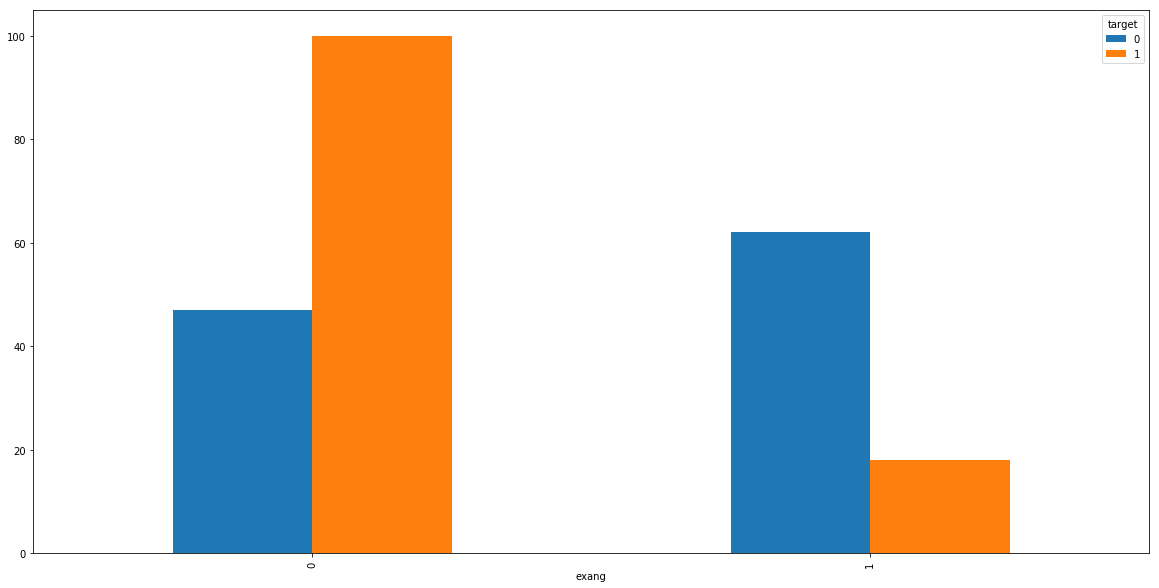

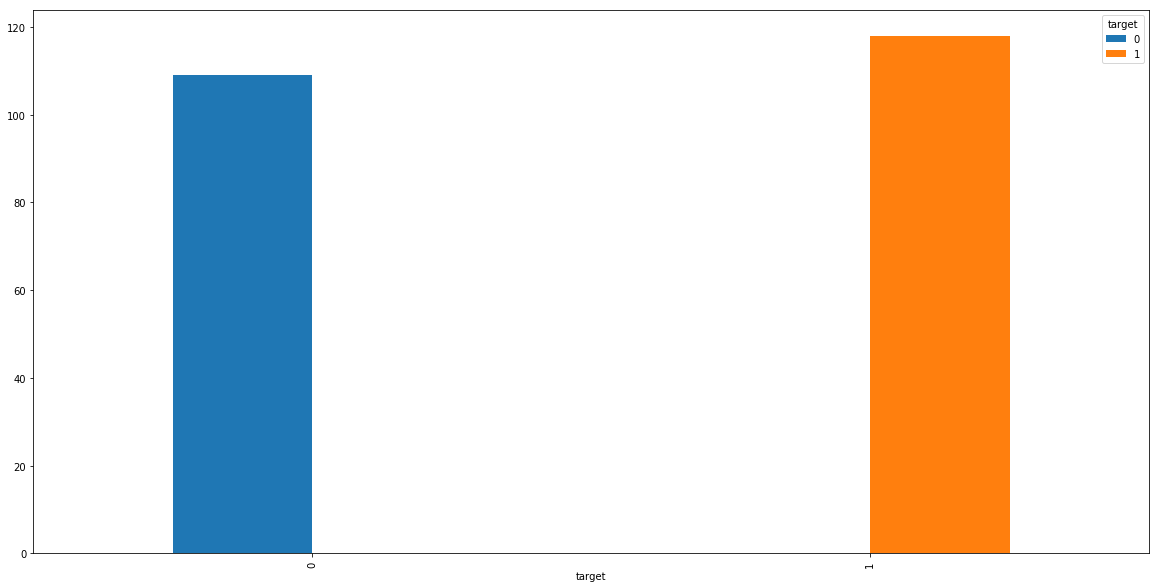

In [65]:
for feature in bin_features:
    pd.crosstab(eda[feature], eda.target);

## Data preprocessing

In [72]:
preproc = eda.copy()
preproc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [73]:
X_train = preproc.drop('target', axis=1)
y_train = preproc.target

In [76]:
num_features.remove('target')
bin_features.remove('target')
cat_features.remove('target')

### Standardisation des num_features

In [77]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train[num_features] = std_scaler.fit_transform(X_train[num_features])

In [83]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
205,-0.286555,1,0,-0.196713,0.128145,0,1,0.506160,1,-0.882421,2,1,3
41,-0.749529,1,1,-0.084518,-0.070279,0,0,1.329338,0,-0.701799,1,0,2
84,-1.443991,0,0,-1.655259,0.326569,0,0,-1.183521,0,-0.340556,1,0,2
246,0.176420,0,0,0.139874,3.183876,0,0,0.029583,1,0.833486,1,2,3
154,-1.791222,0,2,0.364266,-0.566339,0,1,0.116234,0,-0.882421,1,0,2


In [80]:
bin_features

['sex', 'fbs', 'exang']

In [81]:
cat_features

['cp', 'restecg', 'slope', 'ca', 'thal']

In [86]:
X_train = pd.get_dummies(X_train, columns=cat_features)

In [87]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
205,-0.286555,1,-0.196713,0.128145,0,0.506160,1,-0.882421,1,0,...,1,0,1,0,0,0,0,0,0,1
41,-0.749529,1,-0.084518,-0.070279,0,1.329338,0,-0.701799,0,1,...,0,1,0,0,0,0,0,0,1,0
84,-1.443991,0,-1.655259,0.326569,0,-1.183521,0,-0.340556,1,0,...,0,1,0,0,0,0,0,0,1,0
246,0.176420,0,0.139874,3.183876,0,0.029583,1,0.833486,1,0,...,0,0,0,1,0,0,0,0,0,1
154,-1.791222,0,0.364266,-0.566339,0,0.116234,0,-0.882421,0,0,...,0,1,0,0,0,0,0,0,1,0


## Premier modèle : régression logistique

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='f1')

array([0.92      , 0.84      , 0.85714286, 0.875     , 0.86363636])

In [93]:
lr_pred = pd.DataFrame({'true': y_train, 'pred': lr.predict(X_train)})
lr_pred.head(20)

,true,pred
205,0,0
41,1,1
84,1,1
246,0,0
154,1,1
73,1,1
208,0,0
180,0,0
202,0,0
250,0,0


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=lr.predict(X_train), y_true=y_train))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       109
           1       0.87      0.92      0.89       118

   micro avg       0.89      0.89      0.89       227
   macro avg       0.89      0.88      0.88       227
weighted avg       0.89      0.89      0.89       227



In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=lr.predict(X_train), y_true=y_train)

array([[ 93,  16],
       [ 10, 108]], dtype=int64)

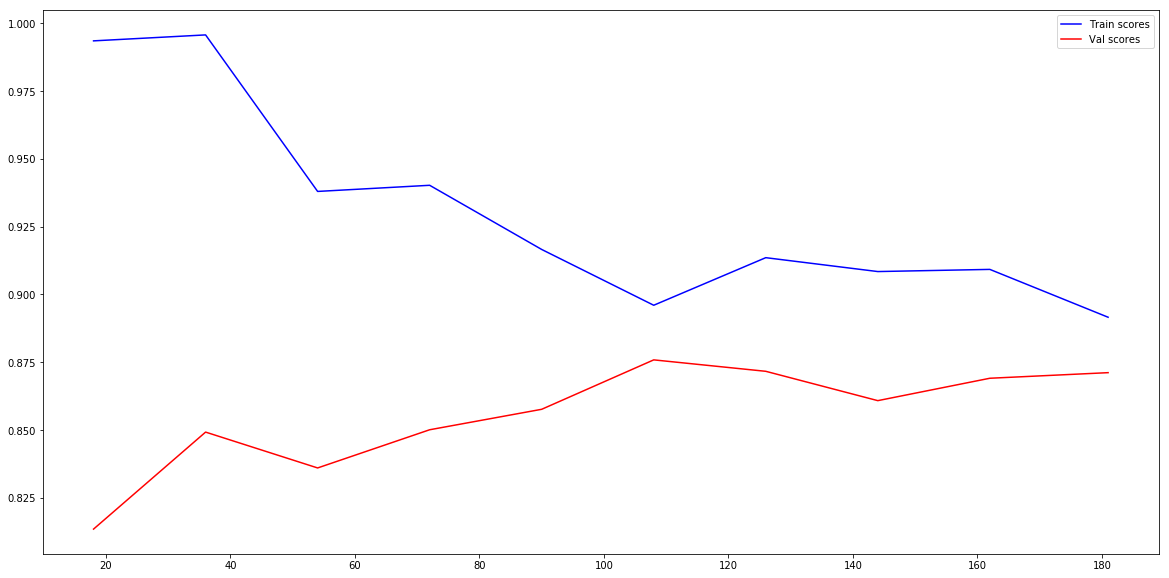

In [119]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(estimator=lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='f1', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'b', label='Train scores')
plt.plot(train_sizes, val_scores_mean, 'r', label='Val scores')
plt.legend()
plt.show()